In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from scipy.io import loadmat
from keras.utils import to_categorical
import itertools

import warnings
warnings.simplefilter('ignore')

In [5]:
def load_mnist_dataset():
    """
    Load MNIST-original dataset

    Returns:
    - mnist_data -- an array of arrays in the shape of (784,)
    - mnist_label -- an array of labels
    - classes -- array of labels classes(a set of labels)
    - shape -- shape of data item
    - channels_count -- channel count of data images
    """

    mnist = loadmat("mnist-original.mat")
    mnist_data = mnist["data"].T
    mnist_data = mnist_data.reshape(len(mnist_data), 28, 28, 1)
    mnist_label = mnist["label"][0]
    count = len(set(mnist_label))
    return mnist_data, mnist_label, count, (28, 28, 1)

In [6]:
# Download data from MNIST-original dataset
data, labels, classes_count, data_shape = load_mnist_dataset()

print("data shape: " + str(data.shape))
print("labels shape: " + str(labels.shape))
print("classes count: " + str(classes_count))

data shape: (70000, 28, 28, 1)
labels shape: (70000,)
classes count: 10


In [7]:
def plot_images_sample(X, Y):
    # Draw plot for images sample
    
    plt.figure(figsize=(10,10))
    rand_indicies = np.random.randint(len(X), size=25)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
        plt.xlabel(Y[index])
    plt.show()

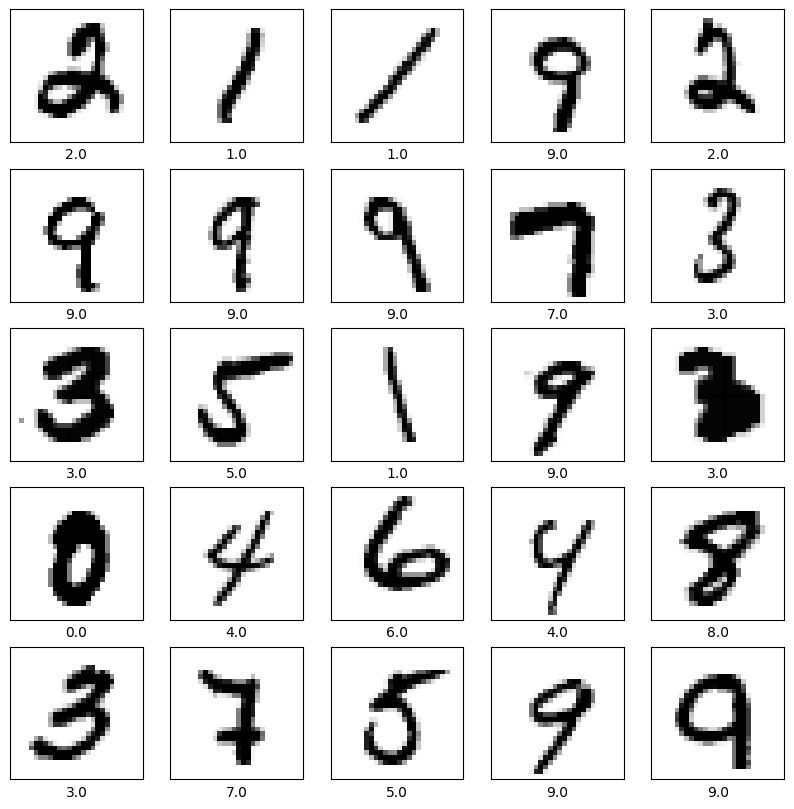

In [8]:
# Draw plot for images sample
plot_images_sample(data, labels)

In [9]:
def fe_data(df, target):
    # FE: scaling data ant transform target to categorical
    df = df / 255.
    target = to_categorical(target)
    return df, target

In [10]:
# FE and data splitting
test_size_part = 0.1
x_train_orig, x_test_orig, y_train_orig, y_test_orig = train_test_split(data, labels, test_size=test_size_part, shuffle=True)
X_train, Y_train = fe_data(x_train_orig, y_train_orig)
X_test, Y_test = fe_data(x_test_orig, y_test_orig)

In [11]:
# Model building
model = models.Sequential([
        layers.Conv2D(8, kernel_size=(4, 4), strides=(1, 1), padding='same', activation='relu', input_shape=data_shape),
        layers.MaxPooling2D((8, 8), padding='same'),
        layers.Conv2D(16, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'),
        layers.MaxPooling2D((4, 4), padding='same'),
        layers.Flatten(),
        layers.Dense(classes_count)
    ])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         136       
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 8)           0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 16)          528       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 10)               

In [12]:
# Model training
epochs_num = 10
validation_split_part = 0.2
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=epochs_num, validation_split=validation_split_part)


Epoch 1/10


1575/1575 [==============================] - 13s 7ms/step - loss: 1.0035 - accuracy: 0.6903 - val_loss: 0.4361 - val_accuracy: 0.8659
Epoch 2/10
1575/1575 [==============================] - 12s 8ms/step - loss: 0.3593 - accuracy: 0.8912 - val_loss: 0.2994 - val_accuracy: 0.9098
Epoch 3/10
1575/1575 [==============================] - 10s 7ms/step - loss: 0.2712 - accuracy: 0.9162 - val_loss: 0.2388 - val_accuracy: 0.9272
Epoch 4/10
1575/1575 [==============================] - 13s 8ms/step - loss: 0.2322 - accuracy: 0.9279 - val_loss: 0.2125 - val_accuracy: 0.9333
Epoch 5/10
1575/1575 [==============================] - 13s 8ms/step - loss: 0.2064 - accuracy: 0.9362 - val_loss: 0.1891 - val_accuracy: 0.9409
Epoch 6/10
1575/1575 [==============================] - 15s 9ms/step - loss: 0.1892 - accuracy: 0.9407 - val_loss: 0.1838 - val_accuracy: 0.9437
Epoch 7/10
1575/1575 [==============================] - 13s 8ms/step - loss: 0.1759 - accuracy: 0.9443 - val_loss: 0.1686 - val

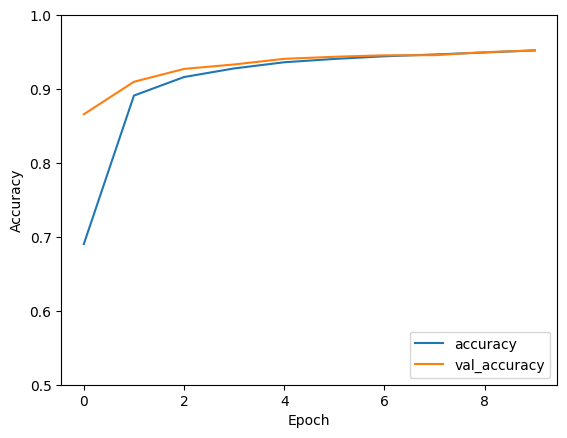

In [13]:
# Draw plot for CNN training
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [14]:
# Print test prediction accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("test accuracy: " + str(test_acc))

219/219 - 1s - loss: 0.1460 - accuracy: 0.9543 - 613ms/epoch - 3ms/step
test accuracy: 0.954285740852356


In [15]:
def get_predictions(X_test):
    # Digits prediction

    predictions = model.predict(X_test)    
    predictions = np.argmax(predictions, axis=1)
    
    return predictions

219/219 [==============================] - 1s 3ms/step


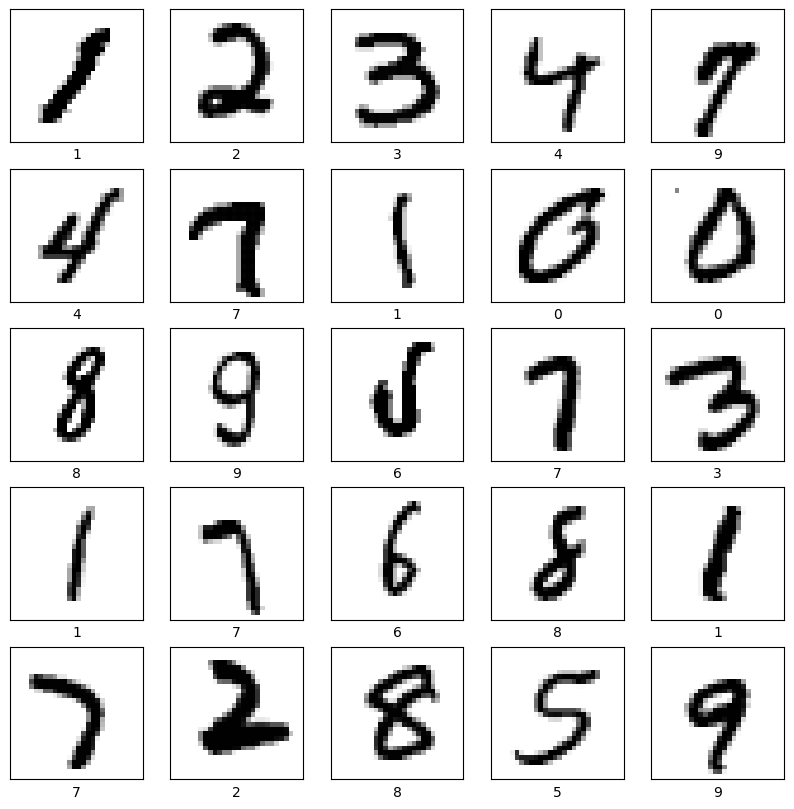

In [16]:
# Prediction and display it
predictions = get_predictions(X_test)
plot_images_sample(X_test, predictions)

In [17]:
# Thanks to https://www.kaggle.com/vbmokin/tensorflow-keras-gpu-for-chinese-mnist-prediction
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    #define the traces
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    #add traces to the figure
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    #set the layout for the figure
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])
    #plot
    iplot(fig, filename='accuracy-loss')

In [19]:
# Plotting the loss error (Plotly)
plot_accuracy_and_loss(history)

In [20]:
def plot_cm(train, target_train):
# Look at confusion matrix 
# Thanks to https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    # Predict the values from the validation dataset
    Y_pred = model.predict(train)
    # Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(target_train,axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    # plot the confusion matrix
    plot_confusion_matrix(confusion_mtx, classes = range(10))

1969/1969 [==============================] - 5s 3ms/step


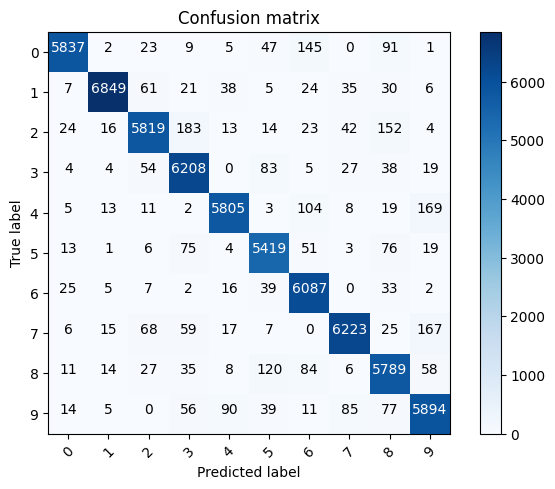

In [21]:
# Draw confusing matrix for training data
plot_cm(X_train, Y_train)

219/219 [==============================] - 1s 2ms/step


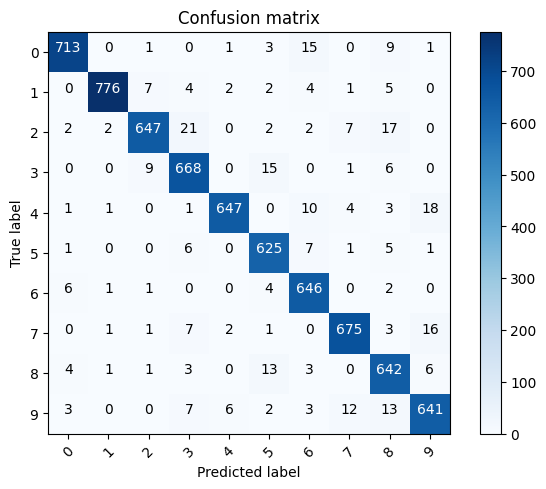

In [22]:
# Draw confusing matrix for test data
plot_cm(X_test, Y_test)

In [23]:
def pred_wrong_display_MNIST_dataset(X_test, predictions, Y_test):
    # Displays misclassified digits from MNIST dataset
    
    X_test_wrong = []
    predictions_wrong = []
    Y_test_pred = []
    for i in range(len(X_test)):
        Y_test_pred.append(np.argmax(Y_test[i]))
        if predictions[i] != Y_test_pred[i]:
            #print(i, predictions[i], Y_test_pred[i])
            X_test_wrong.append(X_test[i])
            predictions_wrong.append(predictions[i])

    plot_images_sample(X_test_wrong, predictions_wrong)
        
    print('Accuracy is', round(accuracy_score(Y_test_pred, predictions),3))
    
    return Y_test_pred

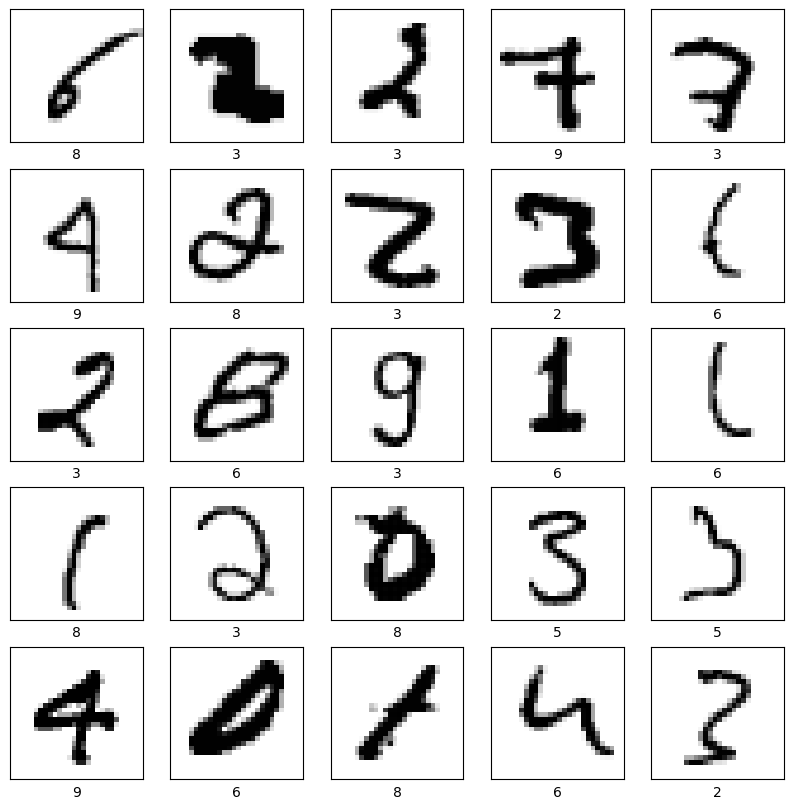

Accuracy is 0.954


In [24]:
# Displays misclassified digits from MNIST
Y_test_pred = pred_wrong_display_MNIST_dataset(X_test, predictions, Y_test)

In [28]:
# Find all images in input folder
data_files = []
for dirname, _, filenames in os.walk('/images'):
    for filename in filenames:
        data_files.append(os.path.join(dirname, filename))
data_files

[]